# Diviations plots

## Min VS Mean Vs MAX deviation plot:
Average line off

"plots/['min', 'mean', 'max'] deviations.png"

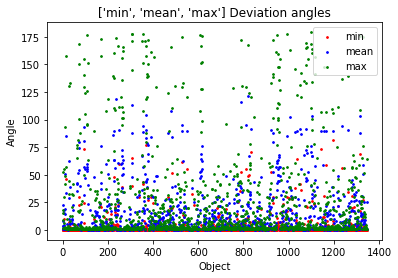

In [3]:
from plots_generation import Drawing_plots 
Drawing_plots("scatter",["min", "mean", "max"]).drawing_plots()

## Mean floor VS Mean ceiling deviations plot:
Average line on

"plots/('floor_mean', 'ceiling_mean') deviations.png"

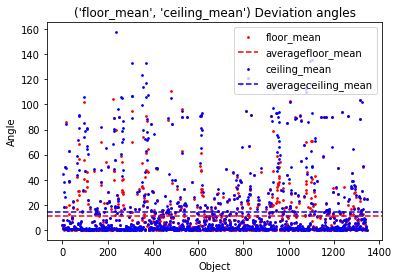

In [13]:
from plots_generation import Drawing_plots 
Drawing_plots("scatter", ("floor_mean","ceiling_mean"),average_line = True).drawing_plots()

## Mean deviations VS Aproximation:
Average line off

'plots/floor_max deviations.png'

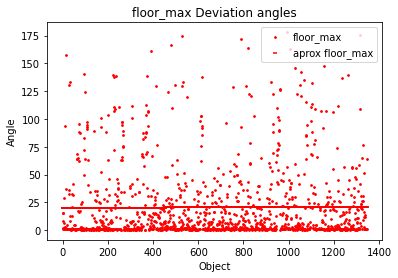

In [2]:
from plots_generation import Drawing_plots 
Drawing_plots("scatter", ("floor_max",), aprox_line = True).drawing_plots()